In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sc
from ydata_profiling import ProfileReport
from scipy import stats as sts
import sklearn 
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression, ElasticNet
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, f1_score, mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_log_error, explained_variance_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer, KNNImputer
sklearn.impute.KNNImputer
import phik
from typing import Literal
from lightgbm import LGBMRegressor
import umap
import optuna
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [3]:
df = pd.read_csv('data/portugal_listinigs.csv')

/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_13864/499035845.py:1: DtypeWarning: Columns (6,8,12,13,14,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/portugal_listinigs.csv')


In [4]:
df

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,2nd Floor,1.0,True,NaN,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0
1,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,1st Floor,0.0,False,1990.0,...,True,NaN,0.0,NaN,NaN,NaN,27.0,NaN,NaN,1.0
2,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,3rd Floor,1.0,True,2003.0,...,False,NaN,2.0,NaN,NaN,NaN,84.0,NaN,NaN,2.0
3,350000.0,Faro,Portimão,Portimão,Apartment,C,4th Floor,0.0,False,1985.0,...,True,NaN,2.0,NaN,NaN,NaN,68.0,NaN,NaN,1.0
4,175000.0,Faro,Faro,Faro (Sé e São Pedro),House,NC,NaN,0.0,False,1950.0,...,False,NaN,4.0,NaN,NaN,NaN,78.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,Valpaços,Valpaços e Sanfins,House,F,NaN,1.0,NaN,1982.0,...,False,False,NaN,3.0,1.0,NaN,190.0,18240.0,238.00,3.0
135532,77500.0,Vila Real,Montalegre,Salto,Apartment,NC,NaN,0.0,NaN,2010.0,...,False,False,NaN,1.0,NaN,New,39.0,NaN,60.00,1.0
135533,50000.0,Vila Real,Alijó,Castedo e Cotas,House,NC,NaN,1.0,NaN,1987.0,...,False,False,NaN,2.0,1.0,NaN,84.0,NaN,84.50,2.0
135534,36000.0,Vila Real,Sabrosa,Paços,Land,NC,NaN,0.0,NaN,NaN,...,False,False,NaN,NaN,0.0,NaN,NaN,300.0,240.88,0.0


In [5]:
df.isna().sum()

Price                       300
District                      0
City                          0
Town                          2
Type                         16
EnergyCertificate            14
Floor                    107607
Parking                     194
HasParking                67321
ConstructionYear          47515
TotalArea                  8383
GrossArea                107898
EnergyEfficiencyLevel     68247
PublishDate              106297
Garage                    68247
Elevator                     32
ElectricCarsCharging      68247
TotalRooms                62292
NumberOfBedrooms          88495
NumberOfWC                78280
ConservationStatus       116244
LivingArea                30584
LotSize                   95953
BuiltArea                108919
NumberOfBathrooms          6836
dtype: int64

In [6]:
df = df.dropna(subset='Price')

In [7]:
df

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,2nd Floor,1.0,True,NaN,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0
1,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,1st Floor,0.0,False,1990.0,...,True,NaN,0.0,NaN,NaN,NaN,27.0,NaN,NaN,1.0
2,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,3rd Floor,1.0,True,2003.0,...,False,NaN,2.0,NaN,NaN,NaN,84.0,NaN,NaN,2.0
3,350000.0,Faro,Portimão,Portimão,Apartment,C,4th Floor,0.0,False,1985.0,...,True,NaN,2.0,NaN,NaN,NaN,68.0,NaN,NaN,1.0
4,175000.0,Faro,Faro,Faro (Sé e São Pedro),House,NC,NaN,0.0,False,1950.0,...,False,NaN,4.0,NaN,NaN,NaN,78.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,Valpaços,Valpaços e Sanfins,House,F,NaN,1.0,NaN,1982.0,...,False,False,NaN,3.0,1.0,NaN,190.0,18240.0,238.00,3.0
135532,77500.0,Vila Real,Montalegre,Salto,Apartment,NC,NaN,0.0,NaN,2010.0,...,False,False,NaN,1.0,NaN,New,39.0,NaN,60.00,1.0
135533,50000.0,Vila Real,Alijó,Castedo e Cotas,House,NC,NaN,1.0,NaN,1987.0,...,False,False,NaN,2.0,1.0,NaN,84.0,NaN,84.50,2.0
135534,36000.0,Vila Real,Sabrosa,Paços,Land,NC,NaN,0.0,NaN,NaN,...,False,False,NaN,NaN,0.0,NaN,NaN,300.0,240.88,0.0


<Axes: >

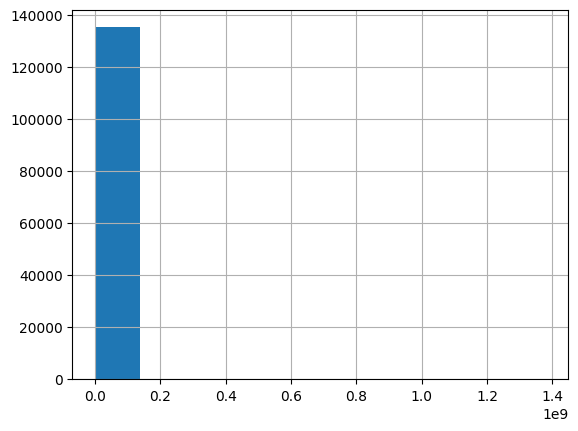

In [8]:
df['Price'].hist()

In [9]:
# profile = ProfileReport(df, minimal=True)
# profile.to_file('real_estate_report.html')

In [10]:
print(df.info(memory_usage="deep"))
print(df.memory_usage(deep=True).sum() / 1024**2, "MB")


<class 'pandas.core.frame.DataFrame'>
Index: 135236 entries, 0 to 135535
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Price                  135236 non-null  float64
 1   District               135236 non-null  object 
 2   City                   135236 non-null  object 
 3   Town                   135234 non-null  object 
 4   Type                   135220 non-null  object 
 5   EnergyCertificate      135222 non-null  object 
 6   Floor                  27846 non-null   object 
 7   Parking                135042 non-null  float64
 8   HasParking             68075 non-null   object 
 9   ConstructionYear       87866 non-null   float64
 10  TotalArea              126859 non-null  float64
 11  GrossArea              27617 non-null   float64
 12  EnergyEfficiencyLevel  67129 non-null   object 
 13  PublishDate            29226 non-null   object 
 14  Garage                 67129 non-null   o

In [11]:
df

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,2nd Floor,1.0,True,NaN,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0
1,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,1st Floor,0.0,False,1990.0,...,True,NaN,0.0,NaN,NaN,NaN,27.0,NaN,NaN,1.0
2,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,3rd Floor,1.0,True,2003.0,...,False,NaN,2.0,NaN,NaN,NaN,84.0,NaN,NaN,2.0
3,350000.0,Faro,Portimão,Portimão,Apartment,C,4th Floor,0.0,False,1985.0,...,True,NaN,2.0,NaN,NaN,NaN,68.0,NaN,NaN,1.0
4,175000.0,Faro,Faro,Faro (Sé e São Pedro),House,NC,NaN,0.0,False,1950.0,...,False,NaN,4.0,NaN,NaN,NaN,78.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,Valpaços,Valpaços e Sanfins,House,F,NaN,1.0,NaN,1982.0,...,False,False,NaN,3.0,1.0,NaN,190.0,18240.0,238.00,3.0
135532,77500.0,Vila Real,Montalegre,Salto,Apartment,NC,NaN,0.0,NaN,2010.0,...,False,False,NaN,1.0,NaN,New,39.0,NaN,60.00,1.0
135533,50000.0,Vila Real,Alijó,Castedo e Cotas,House,NC,NaN,1.0,NaN,1987.0,...,False,False,NaN,2.0,1.0,NaN,84.0,NaN,84.50,2.0
135534,36000.0,Vila Real,Sabrosa,Paços,Land,NC,NaN,0.0,NaN,NaN,...,False,False,NaN,NaN,0.0,NaN,NaN,300.0,240.88,0.0


In [12]:
df_num = df.select_dtypes(include='number')

In [13]:
df_num['Price'][df_num['Price'] > df_num['Price'].mean() * 6]

18         2950000.0
56        18500000.0
114        2600000.0
168        4295000.0
191        2499999.0
             ...    
134970     2750000.0
135031     6900000.0
135048     2400000.0
135057     2400000.0
135378     5000000.0
Name: Price, Length: 2111, dtype: float64

In [14]:
df = df[df['Price'] != df['Price'].max()]
df

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,2nd Floor,1.0,True,NaN,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0
1,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,1st Floor,0.0,False,1990.0,...,True,NaN,0.0,NaN,NaN,NaN,27.0,NaN,NaN,1.0
2,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,3rd Floor,1.0,True,2003.0,...,False,NaN,2.0,NaN,NaN,NaN,84.0,NaN,NaN,2.0
3,350000.0,Faro,Portimão,Portimão,Apartment,C,4th Floor,0.0,False,1985.0,...,True,NaN,2.0,NaN,NaN,NaN,68.0,NaN,NaN,1.0
4,175000.0,Faro,Faro,Faro (Sé e São Pedro),House,NC,NaN,0.0,False,1950.0,...,False,NaN,4.0,NaN,NaN,NaN,78.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,Valpaços,Valpaços e Sanfins,House,F,NaN,1.0,NaN,1982.0,...,False,False,NaN,3.0,1.0,NaN,190.0,18240.0,238.00,3.0
135532,77500.0,Vila Real,Montalegre,Salto,Apartment,NC,NaN,0.0,NaN,2010.0,...,False,False,NaN,1.0,NaN,New,39.0,NaN,60.00,1.0
135533,50000.0,Vila Real,Alijó,Castedo e Cotas,House,NC,NaN,1.0,NaN,1987.0,...,False,False,NaN,2.0,1.0,NaN,84.0,NaN,84.50,2.0
135534,36000.0,Vila Real,Sabrosa,Paços,Land,NC,NaN,0.0,NaN,NaN,...,False,False,NaN,NaN,0.0,NaN,NaN,300.0,240.88,0.0


In [15]:
for col in df_num.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df_num[col].median()
    df[col] = np.where((df[col] > upper_bound) | (df[col] < lower_bound), median, df[col])

/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_13864/3488598229.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where((df[col] > upper_bound) | (df[col] < lower_bound), median, df[col])
/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_13864/3488598229.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where((df[col] > upper_bound) | (df[col] < lower_bound), median, df[col])
/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_13864/3488598229.py:9: 

<Axes: >

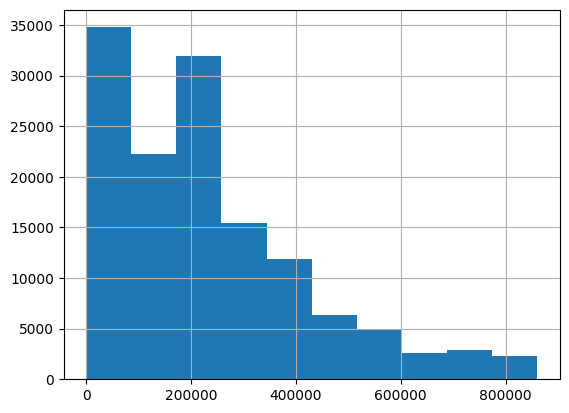

In [16]:
df['Price'].hist()

In [49]:
from geopy.geocoders import Nominatim
from tqdm import tqdm

In [ ]:
geolocator = Nominatim(user_agent="city_to_coords")

def get_coordinates(city_list):
    results = []
    for city in tqdm(city_list, desc="Обработка городов"):
        try:
            location = geolocator.geocode(city)
            if location:
                results.append((city, location.latitude, location.longitude))
            else:
                results.append((city, None, None))
        except Exception as e:
            print(f"Ошибка при обработке {city}: {e}")
            results.append((city, None, None))
    return results


coords = get_coordinates(df2['City'].unique())
coords


In [62]:
l = []
la = []
c = []
for i in coords: 
    la.append(i[1])
    l.append(i[2])


In [113]:
df

,Price,District,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,...,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms,lactitude,longitude
0,250000.0,Faro,Apartment,A+,2nd Floor,1.0,True,NaN,114.0,NaN,...,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0,37.152962,-7.887914
1,9500.0,Faro,Apartment,NC,1st Floor,0.0,False,1990.0,27.0,NaN,...,0.0,NaN,NaN,NaN,27.0,NaN,NaN,1.0,37.088241,-8.252634
2,580000.0,Faro,Apartment,D,3rd Floor,1.0,True,2003.0,84.0,NaN,...,2.0,NaN,NaN,NaN,84.0,NaN,NaN,2.0,37.082980,-8.909612
3,350000.0,Faro,Apartment,C,4th Floor,0.0,False,1985.0,68.0,NaN,...,2.0,NaN,NaN,NaN,68.0,NaN,NaN,1.0,37.137581,-8.536843
4,175000.0,Faro,House,NC,NaN,0.0,False,1950.0,78.0,NaN,...,4.0,NaN,NaN,NaN,78.0,NaN,NaN,2.0,37.016273,-7.935177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,100000.0,Coimbra,Land,NC,NaN,0.0,False,NaN,1100.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,40.211193,-8.429463
3001,29000.0,Coimbra,Other - Residential,NC,NaN,0.0,False,NaN,159.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,40.172664,-8.684542
3002,25000.0,Coimbra,Land,NC,NaN,0.0,False,NaN,159.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,39.721059,-1.439523
3003,53000.0,Coimbra,Land,NC,NaN,0.0,False,NaN,159.0,164.0,...,NaN,NaN,NaN,NaN,118.0,NaN,NaN,0.0,40.211193,-8.429463


In [63]:
df['lactitude'] = df['City'].map(dict(zip(df2['City'].unique(), la)))
df['longitude'] = df['City'].map(dict(zip(df2['City'].unique(), l)))

/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_13864/2620103114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lactitude'] = df['City'].map(dict(zip(df2['City'].unique(), la)))
/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_13864/2620103114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['longitude'] = df['City'].map(dict(zip(df2['City'].unique(), l)))


In [65]:
df = df.drop(columns=['City', 'Town'] )

In [53]:
df['City'].unique()

(275,)

In [91]:
X = df.drop(columns='Price')
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [92]:
num_cols = X_train.select_dtypes(include='number').columns
binary = X_train.nunique()[df.nunique() == 2].index
cat_cols = X_train.drop(columns='Floor').select_dtypes(include='object').columns

In [120]:
s = list(X_train['Floor'].value_counts().index)
new_order = [7, 0, 1, 2, 3, 4, 5, 6, 8, 9, 12, 11, 13 ,10, 14]
new = [s[i] for i in new_order]
new

['Basement Level',
 'Ground Floor',
 '1st Floor',
 '2nd Floor',
 '3rd Floor',
 '4th Floor',
 '5th Floor',
 '6th Floor',
 '7th Floor',
 '8th Floor',
 '9th Floor',
 'Above 10th Floor',
 'Top Floor',
 'Duplex',
 'Triplex']

In [105]:
np.unique(new)

array(['1st Floor', '2nd Floor', '3rd Floor', '4th Floor', '5th Floor',
       '6th Floor', '7th Floor', '8th Floor', '9th Floor',
       'Above 10th Floor', 'Attic', 'Basement', 'Basement Level',
       'Mezzanine', 'Service Floor', 'Top Floor'], dtype='<U16')

In [97]:
class BinaryEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.feature_idx_ = None

    def fit(self, X, y=None):
        # Сохраняем индексы колонок для numpy array
        if isinstance(X, np.ndarray):
            self.feature_idx_ = np.arange(X.shape[1])
        return self

    def transform(self, X):
        # Преобразуем входные данные в numpy array если это еще не сделано
        X_arr = np.array(X) if not isinstance(X, np.ndarray) else X.copy()
        # Преобразуем все значения в int
        return X_arr.astype(int)

In [121]:
def create_pipeline(trial):
    num_pipeline = Pipeline([
        ('imputer', KNNImputer(n_neighbors=5)),
        ('scaler', PowerTransformer())
    ])
    cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder())
    ])
    binary_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', BinaryEncoder(columns=binary)),
        ('scaler', PowerTransformer())
    ])
    personal_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(categories=[np.unique(new)])), 
        ('scaler', PowerTransformer())])
    
    model = trial.suggest_categorical('model', ['lgbm', 'xgb'])
    
    if model == 'xgb':
        n_estimators = 300
        learning_rate = trial.suggest_float('learning_rate', 0.001, 0.3)
        max_depth = trial.suggest_int('max_depth', 1, 10)
        reg_alpha = trial.suggest_float('reg_alpha', 0.1, 4)
        reg_lambda = trial.suggest_float('reg_lambda', 0.01, 1)
        regressor = XGBRegressor(n_estimators=n_estimators, 
                             learning_rate=learning_rate, 
                             max_depth=max_depth,
                             reg_alpha=reg_alpha,
                             reg_lambda=reg_lambda)
        
    elif model == 'lgbm':
        n_estimators = 300
        learning_rate = trial.suggest_float('learning_rate', 0.001, 0.3)
        max_depth = trial.suggest_int('max_depth', 1, 10)
        reg_alpha = trial.suggest_float('reg_alpha', 0.1, 4)
        reg_lambda = trial.suggest_float('reg_lambda', 0.01, 1)
        regressor = LGBMRegressor(n_estimators=n_estimators, 
                             learning_rate=learning_rate, 
                             max_depth=max_depth,
                             reg_alpha=reg_alpha,
                             reg_lambda=reg_lambda)
    else:
        raise ValueError('Model not supported')
    
    
    pipeline = Pipeline([
        ('transform', ColumnTransformer([
            ('num', num_pipeline, num_cols),
            ('cat', cat_pipeline, cat_cols),
            ('binary', binary_pipeline, binary),
            ('floor', personal_pipeline, ['Floor'])
        ])),
        ('model', regressor)
    ])
    return pipeline
    
def objective(trial):
    pipeline_opt = create_pipeline(trial)
    pipeline_opt.fit(X_train, y_train)
    metric = mean_squared_error(y_test, pipeline_opt.predict(X_test))
    return metric


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Лучшие параметры:", study.best_params) 
print("Лучшая точность:", study.best_value) 

# Итоговый пайплайн с лучшими параметрами
best_trial = study.best_trial
final_pipeline = create_pipeline(best_trial)
final_pipeline.fit(X_train, y_train)
        

[I 2025-02-27 01:13:27,951] A new study created in memory with name: no-name-f63c3378-5ff9-4706-b7cc-da0e314286d4
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['EnergyEfficiencyLevel' 'PublishDate' 'Garage' 'ElectricCarsCharging'
 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['EnergyEfficiencyLevel' 'PublishDate' 'Garage' 'ElectricCarsCharging'
 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
[W 2025-02-27 01:13:28,355] Trial 0 failed with parameters: {'model': 'xgb', 'learning_rate': 0.20051876423198708, 'max_depth': 3, 'reg_alpha': 2.314177862926242, 'reg_lambda': 0.344160166998564

ValueError: Found unknown categories ['Beja', 'Castelo Branco'] in column 0 during transform

In [100]:
X_train

,District,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,EnergyEfficiencyLevel,...,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms,lactitude,longitude
926,Faro,Store,D,NaN,0.0,False,2003.0,768.0,164.0,NaN,...,NaN,NaN,NaN,NaN,118.0,NaN,NaN,NaN,37.139548,-8.023260
2968,Faro,House,A,NaN,0.0,False,2022.0,91.0,91.0,NaN,...,1.0,NaN,NaN,NaN,91.0,NaN,NaN,2.0,37.161739,-8.503517
490,Faro,Apartment,E,5th Floor,1.0,True,1999.0,86.0,86.0,NaN,...,1.0,NaN,NaN,NaN,60.0,NaN,NaN,1.0,37.139548,-8.023260
2516,Faro,Apartment,A,Duplex,2.0,True,2023.0,175.0,NaN,NaN,...,3.0,NaN,NaN,NaN,136.0,NaN,NaN,4.0,37.139548,-8.023260
2432,Faro,Apartment,A,1st Floor,1.0,True,2022.0,236.0,101.0,NaN,...,2.0,NaN,NaN,NaN,101.0,NaN,NaN,2.0,37.161739,-8.503517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Faro,Apartment,NC,Ground Floor,0.0,True,1990.0,30.0,30.0,NaN,...,0.0,NaN,NaN,NaN,30.0,NaN,NaN,1.0,37.088241,-8.252634
280,Faro,Apartment,A+,6th Floor,1.0,True,2023.0,750.0,106.0,NaN,...,2.0,NaN,NaN,NaN,79.0,NaN,NaN,2.0,37.137581,-8.536843
1205,Faro,Apartment,NC,8th Floor,1.0,True,2000.0,78.0,78.0,NaN,...,1.0,NaN,NaN,NaN,78.0,NaN,NaN,1.0,37.139548,-8.023260
1923,Guarda,House,F,NaN,0.0,False,1951.0,191.0,310.0,NaN,...,3.0,NaN,NaN,NaN,140.0,NaN,NaN,0.0,40.930394,-7.251758
